<a href="https://colab.research.google.com/github/Deepsphere-AI/DSAI_Python_Programming/blob/main/Unit-7/Data%20Visualization%20with%20Python/Program%20127%20-%20CSLAB_GRAPHING_MATPLOTLIB_CONTOUR_PLOT_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   patient_nbr                            99 non-null     int64 
 1   Race                                   99 non-null     object
 2   Gender                                 99 non-null     object
 3   Age                                    99 non-null     object
 4   Weight(KG)                             99 non-null     int64 
 5   Education Level (Grade)                99 non-null     int64 
 6   Occuptation                            99 non-null     object
 7   Maritial Status                        99 non-null     object
 8   Spouse                                 99 non-null     object
 9   Hospital                  

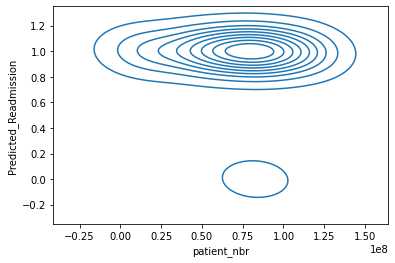

In [7]:

# *********************************************************************************************************************
  
  # File Name 	:   CSLAB_GRAPHING_MATPLOTLIB_CONTOUR_PLOT_V1
  # Purpose 	:   A Program in Python for Contour Plot in matplotlib
  # Author	:   Deepsphere.ai
  # Reviewer 	:   Jothi Periasamy
  # Date 	:   10/26/2022
  # Version	:   1.0	
  
# ***********************************************************************************************************************
   
## Program Description : Program for Contour Plot in matplotlib in Python

## Python Development Environment & Runtime - Python, Anaconda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

#Import the Patient Readmission dataset

vAR_CSLAB_df=pd.read_csv(r'/content/drive/MyDrive/Semester-4/Data Science for Enterprise/Data/Patient Readmission.csv')

vAR_CSLAB_df.head()

vAR_CSLAB_df.info()

#checking for null values

vAR_CSLAB_df.isnull().sum()

vAR_CSLAB_df.columns

vAR_CSLAB_df['Readmission(Y/N)'].value_counts()

#sns.countplot(vAR_CSLAB_df['Readmission(Y/N)'])

# Select all the features

vAR_CSLAB_x=vAR_CSLAB_df[['Weight(KG)','time_in_hospital', 'num_lab_procedures','num_procedures','num_medications','Sleeping History (Hours in a Day)','Walking Activity (No of Steps a Days)','number_diagnoses']]

# Select the Label

vAR_CSLAB_y=vAR_CSLAB_df['Readmission(Y/N)']

vAR_CSLAB_x_train,vAR_CSLAB_x_test,vAR_CSLAB_y_train,vAR_CSLAB_y_test=train_test_split(vAR_CSLAB_x,vAR_CSLAB_y,random_state=0)

vAR_CSLAB_model=LogisticRegression()

vAR_CSLAB_model.fit(vAR_CSLAB_x_train,vAR_CSLAB_y_train)

vAR_CSLAB_y_pred=vAR_CSLAB_model.predict(vAR_CSLAB_x_test)

vAR_CSLAB_y_pred

confusion_matrix(vAR_CSLAB_y_test,vAR_CSLAB_y_pred)

vAR_CSLAB_accuracy=accuracy_score(vAR_CSLAB_y_test,vAR_CSLAB_y_pred)*100

print("Accuracy of the model is {:.2f}".format(vAR_CSLAB_accuracy))

vAR_CSLAB_y_pred = pd.DataFrame(vAR_CSLAB_y_pred)

vAR_CSLAB_y_pred.columns = ['Predicted_Readmission']

#vAR_CSLAB_y_pred.head(2)

vAR_CSLAB_df1 = vAR_CSLAB_df.merge(vAR_CSLAB_y_pred,left_index=True, right_index=True)

sns.kdeplot(x=vAR_CSLAB_df1.patient_nbr[0:100], y=vAR_CSLAB_df1.Predicted_Readmission[0:100])

plt.show()

# ****************************************************************************************************************************
#   Disclaimer.

# We are providing this code block strictly for learning and researching, this is not a production
# ready code. We have no liability on this particular code under any circumstances; users should use
# this code on their own risk. All software, hardware and othr products that are referenced in these 
# materials belong to the respective vendor who developed or who owns this product.

# ****************************************************************************************************************************
  